<a href="https://colab.research.google.com/github/JsantosAn/Desafio-FrontEnd-2021/blob/main/TrabalhoIAFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from numpy.random import randint
from numpy.random import rand
from random import randrange
import numpy.random as rn
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
import time
class MLPlayer(object):
    def __init__(self, peso, bias):
        self.weights =  peso
        self.bias =  bias
    def forward_propagate(self, inputs):
        net_inputs = np.dot(inputs, self.weights)# + self.bias
        activations = self.TanH(net_inputs)
        return activations
    def TanH(self,x):
        return np.tanh(x)
    def _mse(self, target, output):
        MSE = np.square(np.subtract(target,output)).mean()   
        return math.sqrt(MSE)


def PesosBias(oculta,x_teste,pop):
  b2 = []
  p = np.array_split(pop,3)
  for x in range(len(p)):
    if (len(p[x]) > oculta):
      r = randrange(0, len(p[x]))
      b2 = p[x][r]
      p[x] =  np.delete(p[x], r)  
  p1 = p[2].reshape(1,oculta)
  b1 = p[0]
  p2 = p[1].reshape(oculta,1)
  hidden = MLPlayer(p1, b1)
  output = MLPlayer(p2, b2)
  hidden_outputs = hidden.forward_propagate(x_teste)
  y = output.forward_propagate(hidden_outputs)
  return y

def _mse(target, output):
  MSE = np.square(np.subtract(target,output)).mean()   
  return math.sqrt(MSE)


In [42]:
class SA(object):
  def __init__(self,oculta,saida,x_teste,y_teste,objective, n_iter,temperature,search_space,desv,alpha):
        self.oculta =  oculta
        self.saida =  saida
        self.x_teste =  x_teste
        self.y_teste =  y_teste
        self.objective =  objective
        self.n_iter =  n_iter
        self.temperature =  temperature
        self.search_space =  search_space
        self.desv = desv
        self.alpha = alpha

  def gera_vizinhos(self,solucao, desvio_padrao, n_vizinhos, espaco_busca):
      vizinhos = []
      mut = random.uniform(0,1)
      for _ in range(n_vizinhos):
        if mut <= 0.5:
          vizinho = solucao + np.random.normal(loc=0, scale=desvio_padrao)
        else:
          vizinho = np.random.uniform(-5.0, 5.0)

        while vizinho < espaco_busca[0] or vizinho > espaco_busca[1]:
              vizinho = solucao + np.random.normal(loc=0, scale=desvio_padrao)
        vizinhos.append(vizinho)
      return vizinhos

  def Simulate_A(self):
    tamanho =  self.oculta * 3
    solucao = 10 * np.random.random_sample((tamanho+self.saida))-5
    progresso = []
    temperatures = [self.temperature]

    pb = PesosBias(self.oculta,self.x_teste,solucao)
    valor_funcao_objetivo = self.objective(pb,self.y_teste)
    for i in range(self.n_iter):
        rd = random.randint(0,len(solucao)-1)
        v = self.gera_vizinhos(solucao[rd], self.desv,1, self.search_space)
        vizinho = np.delete(solucao, rd)
        vizinho=np.insert(vizinho,rd,v)
        pb = PesosBias(self.oculta,self.x_teste,vizinho)
        fo_vizinho = self.objective(pb,self.y_teste)
        delta = fo_vizinho - valor_funcao_objetivo
        progresso.append(valor_funcao_objetivo)
        if delta < 0: 
            solucao = vizinho
            valor_funcao_objetivo = fo_vizinho
            y = pb
        else:  
          prob_aceitacao = np.exp((-delta) /  self.temperature)
          if np.random.random() < prob_aceitacao:
            solucao = vizinho
            valor_funcao_objetivo = fo_vizinho
            y = pb

          self.temperature *= self.alpha
          temperatures.append(self.temperature)      
    #print(f"FO: {valor_funcao_objetivo}")
    return progresso,y,valor_funcao_objetivo

In [49]:
X = np.arange(-np.pi, np.pi, 0.2)
y = np.sin(X)
y += np.random.normal(scale=0.1, size=y.shape)
y_teste = y.reshape(32, 1)
x_teste = X.reshape(32, 1)

In [47]:
def plot(progresso,y_pred,x_teste,c,fo):
  plt.figure(figsize=(10, 5))
  plt.plot(progresso,label=1100)
  plt.xlabel('Iterações')
  plt.ylabel('FO')
  plt.title(f"FO: {fo}, Camada: {c}")
  plt.show()
  sns.regplot(x=x_teste,y=y_teste).set(title=f"FO: {fo}, Camada: {c}")
  sns.regplot(x=x_teste,y=y_pred)


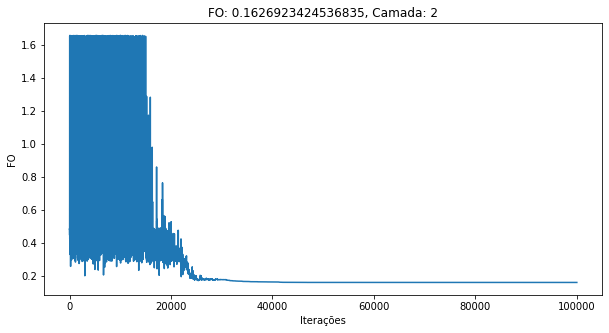

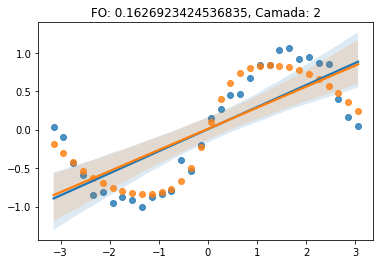

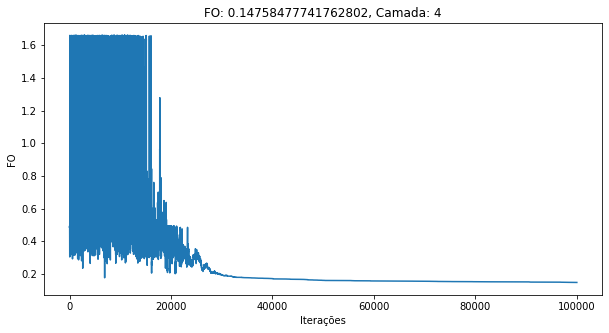

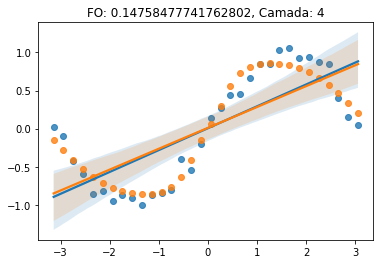

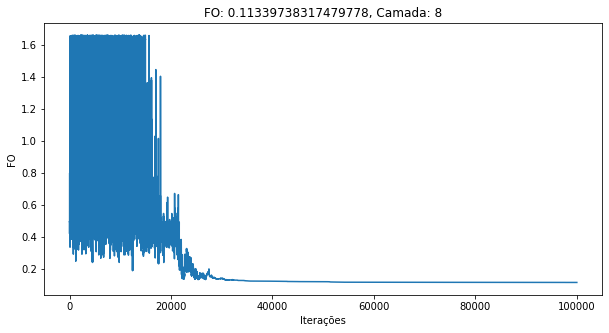

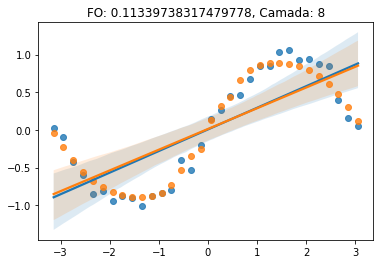

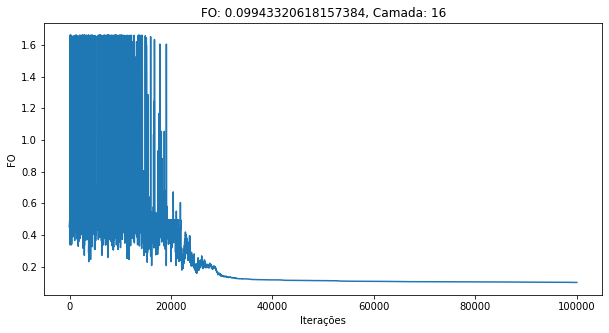

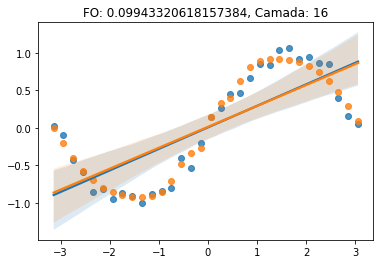

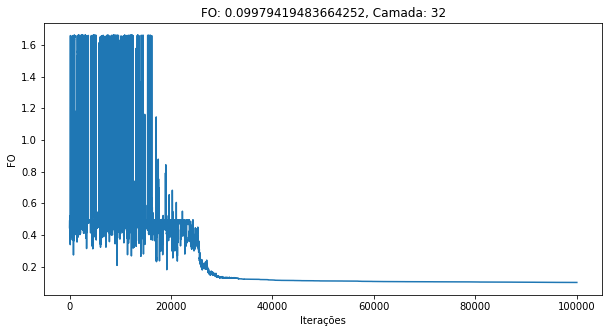

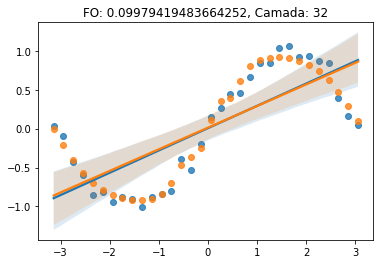

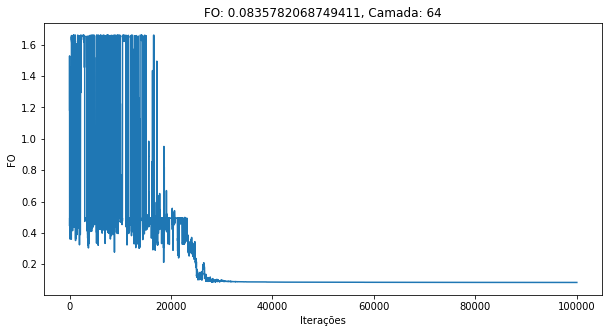

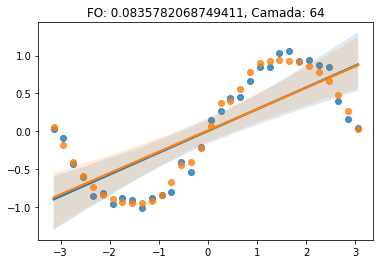

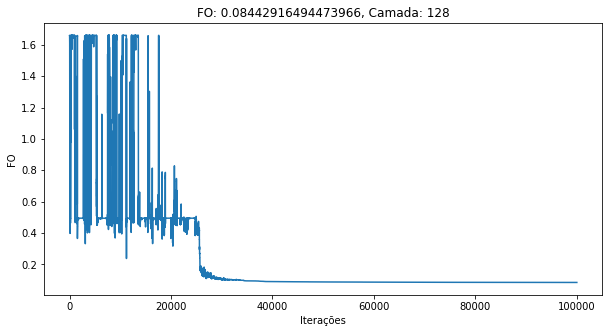

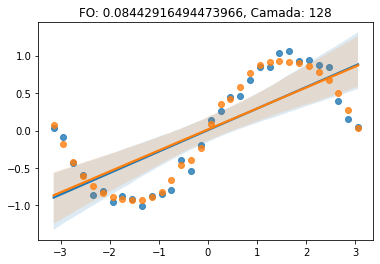

In [50]:
search_space = [-5, 5]
desv = 0.3
n_iter = 100000
n_pop = 50
temperature = 100
alpha = 0.9995
camadas = [ 2, 4, 8, 16, 32, 64 , 128 ]
for c in camadas:
  SimuA = SA(c,1,x_teste,y_teste,_mse, n_iter,temperature,search_space,desv,alpha)
  progresso, y_pred, fo= SimuA.Simulate_A()
  plot(progresso,y_pred,x_teste,c,fo)